# import library and data 

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import tqdm
import cv2     
import tensorflow as tf   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D,BatchNormalization,MaxPool2D,Rescaling,RandomZoom, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback,CSVLogger,EarlyStopping,LearningRateScheduler,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import visualkeras

In [2]:
base_dir ="orginal data"
classes = ['Chickenpox', 'Cowpox', 'Healthy', 'HFMD', 'Measles', 'Monkeypox']

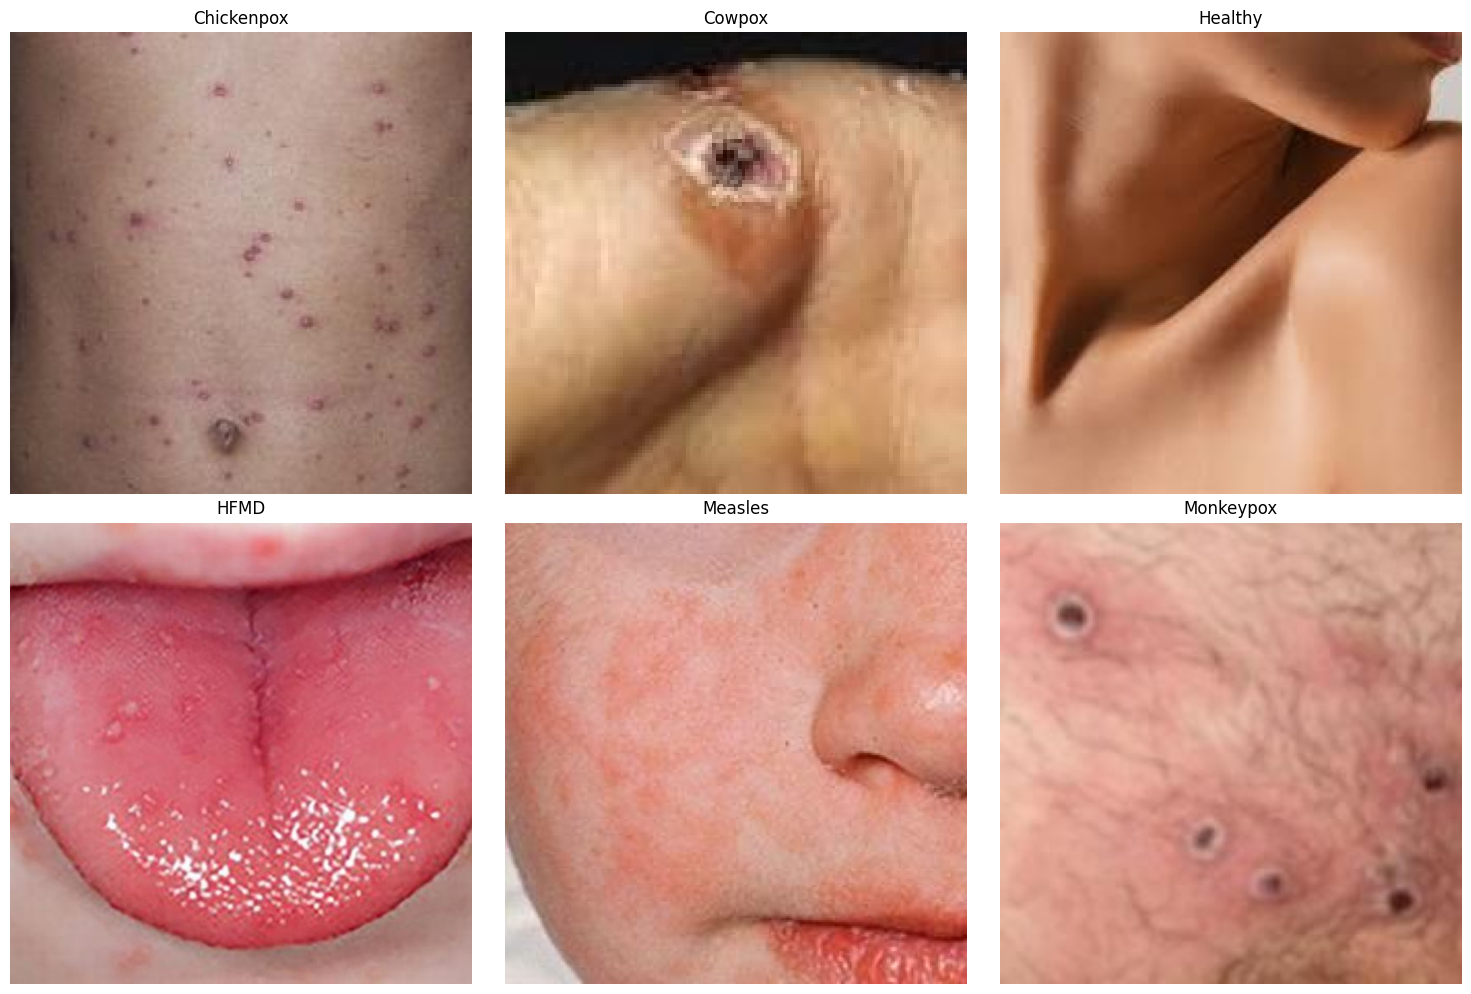

In [3]:
def show_sample_images(data_dir):
    plt.figure(figsize=(15, 10))
    
    for i, label in enumerate(classes):
        folder = os.path.join(data_dir, label)
        img_name = os.listdir(folder)[0]
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Show sample images from the training set
show_sample_images(base_dir)

In [4]:
def count_images(data_dir):
    data_count = {}
    for label in classes:
        folder = os.path.join(data_dir, label)
        data_count[label] = len(os.listdir(folder))
        print(data_count[label])
    return data_count

In [5]:
train_count = count_images(base_dir)
total_count = {label: train_count.get(label, 0) for label in classes}
total_images = sum(total_count.values())

75
66
114
161
55
284


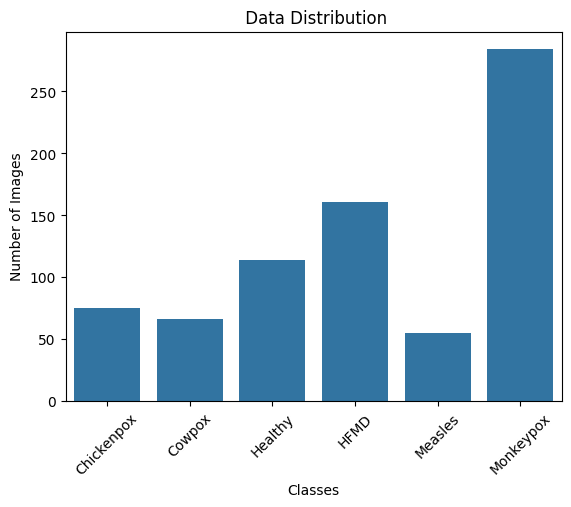

755

In [6]:
def plot_distribution(data_count, title):
    sns.barplot(x=list(data_count.keys()), y=list(data_count.values()))
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for combined train+val and test sets
plot_distribution(total_count, ' Data Distribution')

total_images

In [7]:
def plot_pie_chart(data_count, title):

    values = list(data_count.values())
    labels = list(data_count.keys())

    colormap = plt.get_cmap('Blues')  
    norm = plt.Normalize(min(values), max(values))
    colors = [colormap(norm(value)) for value in values]
    
    plt.figure(figsize=(10, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    plt.show()


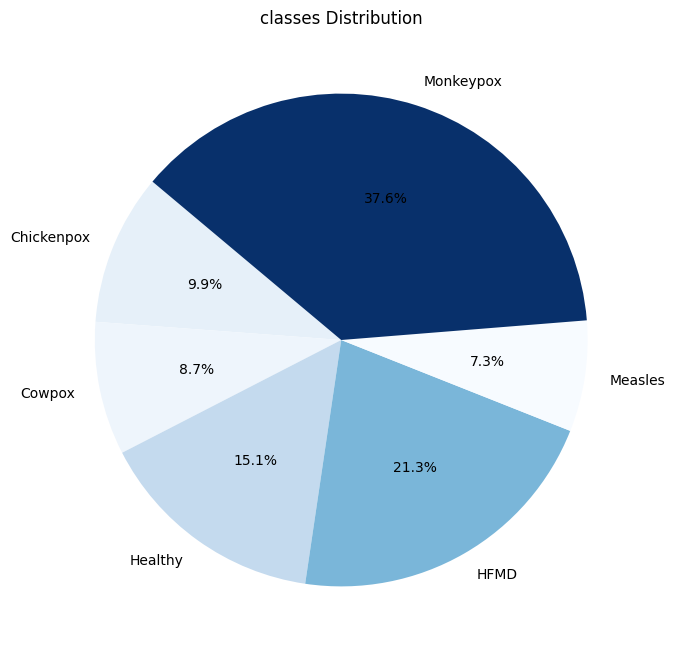

In [8]:
plot_pie_chart(total_count, 'classes Distribution')

In [9]:
class_names = ['Chickenpox', 'Cowpox', 'Healthy', 'HFMD', 'Measles', 'Monkeypox']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [10]:
def load_data():
    data="new_aug_image"

    datasets = [data]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                print(img_path)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output[0]

In [11]:
images,labels= load_data()

Loading new_aug_image


 10%|▉         | 51/525 [00:00<00:01, 449.80it/s]

new_aug_image\Chickenpox\aug_CHP_01_01_0_1602.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_1822.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_5582.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_8155.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_8384.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_8457.jpeg
new_aug_image\Chickenpox\aug_CHP_01_01_0_8536.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_3073.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_3665.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_4124.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_5111.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_5958.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_8244.jpeg
new_aug_image\Chickenpox\aug_CHP_02_01_0_9092.jpeg
new_aug_image\Chickenpox\aug_CHP_02_02_0_1342.jpeg
new_aug_image\Chickenpox\aug_CHP_02_02_0_2711.jpeg
new_aug_image\Chickenpox\aug_CHP_02_02_0_2912.jpeg
new_aug_image\Chickenpox\aug_CHP_02_02_0_3111.jpeg
new_aug_image\Chickenpox\aug_CHP_02_02_0_3303.jpeg
new_aug_image\Chickenpox\aug_CH

 32%|███▏      | 167/525 [00:00<00:00, 542.41it/s]

new_aug_image\Chickenpox\aug_CHP_08_02_0_5203.jpeg
new_aug_image\Chickenpox\aug_CHP_08_02_0_6210.jpeg
new_aug_image\Chickenpox\aug_CHP_08_02_0_926.jpeg
new_aug_image\Chickenpox\aug_CHP_08_02_0_9872.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_2513.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_3843.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_4849.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_6824.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_8556.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_8580.jpeg
new_aug_image\Chickenpox\aug_CHP_09_01_0_9292.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_1965.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_236.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_4425.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_4584.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_6579.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_803.jpeg
new_aug_image\Chickenpox\aug_CHP_10_01_0_8140.jpeg
new_aug_image\Chickenpox\aug_CHP_11_01_0_1580.jpeg
new_aug_image\Chickenpox\aug_CHP_1

 67%|██████▋   | 353/525 [00:00<00:00, 581.31it/s]

new_aug_image\Chickenpox\aug_CHP_22_01_0_5277.jpeg
new_aug_image\Chickenpox\aug_CHP_22_01_0_5654.jpeg
new_aug_image\Chickenpox\aug_CHP_22_01_0_7124.jpeg
new_aug_image\Chickenpox\aug_CHP_22_01_0_7679.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_1849.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_2050.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_3009.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_435.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_5595.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_6873.jpeg
new_aug_image\Chickenpox\aug_CHP_23_01_0_7393.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_1998.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_462.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_474.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_6562.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_6574.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_9649.jpeg
new_aug_image\Chickenpox\aug_CHP_24_01_0_968.jpeg
new_aug_image\Chickenpox\aug_CHP_25_01_0_2120.jpeg
new_aug_image\Chickenpox\aug_CHP_25

 78%|███████▊  | 412/525 [00:00<00:00, 581.09it/s]

new_aug_image\Chickenpox\aug_CHP_42_01_0_4905.jpeg
new_aug_image\Chickenpox\aug_CHP_42_01_0_5385.jpeg
new_aug_image\Chickenpox\aug_CHP_42_01_0_8454.jpeg
new_aug_image\Chickenpox\aug_CHP_42_01_0_8694.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_1207.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_1718.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_2389.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_7540.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_8120.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_8678.jpeg
new_aug_image\Chickenpox\aug_CHP_43_01_0_994.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_1501.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_1822.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_206.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_3329.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_6255.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_6898.jpeg
new_aug_image\Chickenpox\aug_CHP_44_01_0_9660.jpeg
new_aug_image\Chickenpox\aug_CHP_45_01_0_1606.jpeg
new_aug_image\Chickenpox\aug_CHP_

100%|██████████| 525/525 [00:00<00:00, 574.01it/s]


new_aug_image\Chickenpox\aug_CHP_56_01_0_7984.jpeg
new_aug_image\Chickenpox\aug_CHP_56_01_0_9158.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_3298.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_4906.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_5172.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_6640.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_807.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_8245.jpeg
new_aug_image\Chickenpox\aug_CHP_57_01_0_8710.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_1311.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_1610.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_1623.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_178.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_3132.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_7582.jpeg
new_aug_image\Chickenpox\aug_CHP_58_01_0_9395.jpeg
new_aug_image\Chickenpox\aug_CHP_59_01_0_132.jpeg
new_aug_image\Chickenpox\aug_CHP_59_01_0_1472.jpeg
new_aug_image\Chickenpox\aug_CHP_59_01_0_1667.jpeg
new_aug_image\Chickenpox\aug_CHP_5

  0%|          | 0/528 [00:00<?, ?it/s]

new_aug_image\Cowpox\aug_CWP_01_01_0_4368.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_6027.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_6426.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_7505.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_7600.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_7790.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_8356.jpeg
new_aug_image\Cowpox\aug_CWP_01_01_0_9508.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_1453.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_3229.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_474.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_4930.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_57.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_622.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_893.jpeg
new_aug_image\Cowpox\aug_CWP_01_02_0_9987.jpeg
new_aug_image\Cowpox\aug_CWP_02_01_0_1067.jpeg
new_aug_image\Cowpox\aug_CWP_02_01_0_1802.jpeg
new_aug_image\Cowpox\aug_CWP_02_01_0_2230.jpeg
new_aug_image\Cowpox\aug_CWP_02_01_0_5693.jpeg
new_aug_image\Cowpox\aug_CWP_02_01_0_5992.jpeg
new_aug_image\Cowp

  8%|▊         | 41/528 [00:00<00:01, 391.43it/s]

new_aug_image\Cowpox\aug_CWP_04_01_0_6963.jpeg
new_aug_image\Cowpox\aug_CWP_04_01_0_8744.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_1757.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_2602.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_3635.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_4028.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_5810.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_5998.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_7616.jpeg
new_aug_image\Cowpox\aug_CWP_05_01_0_9791.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_154.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_457.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_5074.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_6630.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_7846.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_818.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_8311.jpeg
new_aug_image\Cowpox\aug_CWP_05_02_0_8436.jpeg
new_aug_image\Cowpox\aug_CWP_06_01_0_500.jpeg
new_aug_image\Cowpox\aug_CWP_06_01_0_5184.jpeg
new_aug_image\Cowpox\aug_CWP_06_01_0_5270.jpeg
new_aug_image\Cow

 22%|██▏       | 115/528 [00:00<00:00, 554.43it/s]

new_aug_image\Cowpox\aug_CWP_13_01_0_4766.jpeg
new_aug_image\Cowpox\aug_CWP_13_01_0_6203.jpeg
new_aug_image\Cowpox\aug_CWP_13_01_0_6772.jpeg
new_aug_image\Cowpox\aug_CWP_13_01_0_8098.jpeg
new_aug_image\Cowpox\aug_CWP_13_01_0_9736.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_1049.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_1581.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_261.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_4089.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_8394.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_8645.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_8833.jpeg
new_aug_image\Cowpox\aug_CWP_14_01_0_9659.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_126.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_1950.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_215.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_3462.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_4570.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_4722.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_7384.jpeg
new_aug_image\Cowpox\aug_CWP_15_01_0_7569.jpeg
new_aug_image\Co

 35%|███▍      | 184/528 [00:00<00:00, 585.84it/s]

new_aug_image\Cowpox\aug_CWP_19_01_0_8564.jpeg
new_aug_image\Cowpox\aug_CWP_19_01_0_9430.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_1356.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_1493.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_504.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_5302.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_7357.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_819.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_9076.jpeg
new_aug_image\Cowpox\aug_CWP_20_01_0_9584.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_2514.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_457.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_4750.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_500.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_595.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_8099.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_8266.jpeg
new_aug_image\Cowpox\aug_CWP_21_01_0_9916.jpeg
new_aug_image\Cowpox\aug_CWP_22_01_0_1220.jpeg
new_aug_image\Cowpox\aug_CWP_22_01_0_4514.jpeg
new_aug_image\Cowpox\aug_CWP_22_01_0_4746.jpeg
new_aug_image\Cowp

 46%|████▌     | 243/528 [00:00<00:00, 526.92it/s]

new_aug_image\Cowpox\aug_CWP_26_01_0_3661.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_4348.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_5442.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_5689.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_6378.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_8475.jpeg
new_aug_image\Cowpox\aug_CWP_26_01_0_9592.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_3005.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_364.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_6121.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_6406.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_7718.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_800.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_825.jpeg
new_aug_image\Cowpox\aug_CWP_27_01_0_8527.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_1440.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_5038.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_6294.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_7245.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_7247.jpeg
new_aug_image\Cowpox\aug_CWP_28_01_0_7256.jpeg
new_aug_image\Co

 56%|█████▋    | 297/528 [00:00<00:00, 466.01it/s]

new_aug_image\Cowpox\aug_CWP_29_01_0_6652.jpeg
new_aug_image\Cowpox\aug_CWP_29_01_0_7387.jpeg
new_aug_image\Cowpox\aug_CWP_29_01_0_830.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_1846.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_4052.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_4621.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_5139.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_521.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_5623.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_570.jpeg
new_aug_image\Cowpox\aug_CWP_29_02_0_6480.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_2546.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_2942.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_4809.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_6075.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_7944.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_822.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_8516.jpeg
new_aug_image\Cowpox\aug_CWP_30_01_0_9411.jpeg
new_aug_image\Cowpox\aug_CWP_31_01_0_4077.jpeg
new_aug_image\Cowpox\aug_CWP_31_01_0_5270.jpeg
new_aug_image\Cow

 69%|██████▉   | 363/528 [00:00<00:00, 508.96it/s]

new_aug_image\Cowpox\aug_CWP_33_03_0_305.jpeg
new_aug_image\Cowpox\aug_CWP_33_03_0_4995.jpeg
new_aug_image\Cowpox\aug_CWP_33_03_0_637.jpeg
new_aug_image\Cowpox\aug_CWP_33_03_0_8937.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_3926.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_5164.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_5272.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_5725.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_6576.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_6947.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_7083.jpeg
new_aug_image\Cowpox\aug_CWP_33_04_0_8308.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_27.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_3486.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_3780.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_3919.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_4199.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_7955.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_8444.jpeg
new_aug_image\Cowpox\aug_CWP_33_05_0_8990.jpeg
new_aug_image\Cowpox\aug_CWP_33_06_0_1439.jpeg
new_aug_image\Cow

 82%|████████▏ | 431/528 [00:00<00:00, 548.60it/s]

new_aug_image\Cowpox\aug_CWP_35_01_0_2684.jpeg
new_aug_image\Cowpox\aug_CWP_35_01_0_297.jpeg
new_aug_image\Cowpox\aug_CWP_35_01_0_4858.jpeg
new_aug_image\Cowpox\aug_CWP_35_01_0_5016.jpeg
new_aug_image\Cowpox\aug_CWP_35_01_0_5060.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_1231.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_1590.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_1979.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_3774.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_6080.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_6743.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_7154.jpeg
new_aug_image\Cowpox\aug_CWP_36_01_0_9915.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_1669.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_2091.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_2455.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_2849.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_4920.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_7543.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_7784.jpeg
new_aug_image\Cowpox\aug_CWP_37_01_0_9586.jpeg
new_aug_image\

 92%|█████████▏| 487/528 [00:00<00:00, 542.44it/s]

new_aug_image\Cowpox\aug_CWP_38_01_0_5517.jpeg
new_aug_image\Cowpox\aug_CWP_38_01_0_6745.jpeg
new_aug_image\Cowpox\aug_CWP_38_01_0_9305.jpeg
new_aug_image\Cowpox\aug_CWP_38_01_0_9675.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_3220.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_4521.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_5427.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_5562.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_6961.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_7013.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_7060.jpeg
new_aug_image\Cowpox\aug_CWP_38_02_0_8407.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_1607.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_2469.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_3426.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_5534.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_5987.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_6774.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_7746.jpeg
new_aug_image\Cowpox\aug_CWP_39_01_0_8254.jpeg
new_aug_image\Cowpox\aug_CWP_40_01_0_1626.jpeg
new_aug_image

100%|██████████| 528/528 [00:00<00:00, 533.65it/s]


new_aug_image\Cowpox\aug_CWP_40_02_0_869.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_1460.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_2300.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_3098.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_5966.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_816.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_8257.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_8467.jpeg
new_aug_image\Cowpox\aug_CWP_40_03_0_9136.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_2872.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_3052.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_3065.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_6182.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_7276.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_8481.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_9233.jpeg
new_aug_image\Cowpox\aug_CWP_40_04_0_9539.jpeg
new_aug_image\Cowpox\aug_CWP_41_01_0_1063.jpeg
new_aug_image\Cowpox\aug_CWP_41_01_0_1626.jpeg
new_aug_image\Cowpox\aug_CWP_41_01_0_2485.jpeg
new_aug_image\Cowpox\aug_CWP_41_01_0_2977.jpeg
new_aug_image\C

  0%|          | 0/570 [00:00<?, ?it/s]

new_aug_image\Healthy\aug_HEALTHY_01_01_0_1936.jpeg
new_aug_image\Healthy\aug_HEALTHY_01_01_0_3288.jpeg
new_aug_image\Healthy\aug_HEALTHY_01_01_0_6678.jpeg
new_aug_image\Healthy\aug_HEALTHY_01_01_0_702.jpeg
new_aug_image\Healthy\aug_HEALTHY_01_01_0_9861.jpeg
new_aug_image\Healthy\aug_HEALTHY_02_01_0_2033.jpeg
new_aug_image\Healthy\aug_HEALTHY_02_01_0_2945.jpeg
new_aug_image\Healthy\aug_HEALTHY_02_01_0_34.jpeg
new_aug_image\Healthy\aug_HEALTHY_02_01_0_486.jpeg
new_aug_image\Healthy\aug_HEALTHY_02_01_0_5874.jpeg
new_aug_image\Healthy\aug_HEALTHY_03_01_0_1957.jpeg
new_aug_image\Healthy\aug_HEALTHY_03_01_0_4905.jpeg
new_aug_image\Healthy\aug_HEALTHY_03_01_0_6688.jpeg
new_aug_image\Healthy\aug_HEALTHY_03_01_0_9597.jpeg
new_aug_image\Healthy\aug_HEALTHY_03_01_0_9830.jpeg
new_aug_image\Healthy\aug_HEALTHY_04_01_0_2683.jpeg
new_aug_image\Healthy\aug_HEALTHY_04_01_0_325.jpeg
new_aug_image\Healthy\aug_HEALTHY_04_01_0_3388.jpeg
new_aug_image\Healthy\aug_HEALTHY_04_01_0_8972.jpeg
new_aug_image\Hea

  9%|▉         | 54/570 [00:00<00:00, 535.12it/s]

new_aug_image\Healthy\aug_HEALTHY_101_01_0_9701.jpeg
new_aug_image\Healthy\aug_HEALTHY_102_01_0_528.jpeg
new_aug_image\Healthy\aug_HEALTHY_102_01_0_5567.jpeg
new_aug_image\Healthy\aug_HEALTHY_102_01_0_6221.jpeg
new_aug_image\Healthy\aug_HEALTHY_102_01_0_8448.jpeg
new_aug_image\Healthy\aug_HEALTHY_102_01_0_9216.jpeg
new_aug_image\Healthy\aug_HEALTHY_103_01_0_3118.jpeg
new_aug_image\Healthy\aug_HEALTHY_103_01_0_442.jpeg
new_aug_image\Healthy\aug_HEALTHY_103_01_0_48.jpeg
new_aug_image\Healthy\aug_HEALTHY_103_01_0_572.jpeg
new_aug_image\Healthy\aug_HEALTHY_103_01_0_8763.jpeg
new_aug_image\Healthy\aug_HEALTHY_104_01_0_1282.jpeg
new_aug_image\Healthy\aug_HEALTHY_104_01_0_2517.jpeg
new_aug_image\Healthy\aug_HEALTHY_104_01_0_6768.jpeg
new_aug_image\Healthy\aug_HEALTHY_104_01_0_8244.jpeg
new_aug_image\Healthy\aug_HEALTHY_104_01_0_9904.jpeg
new_aug_image\Healthy\aug_HEALTHY_105_01_0_2772.jpeg
new_aug_image\Healthy\aug_HEALTHY_105_01_0_770.jpeg
new_aug_image\Healthy\aug_HEALTHY_105_01_0_8586.jpeg

 19%|█▉        | 108/570 [00:00<00:00, 518.41it/s]

new_aug_image\Healthy\aug_HEALTHY_14_01_0_8858.jpeg
new_aug_image\Healthy\aug_HEALTHY_14_01_0_9948.jpeg
new_aug_image\Healthy\aug_HEALTHY_15_01_0_1402.jpeg
new_aug_image\Healthy\aug_HEALTHY_15_01_0_4217.jpeg
new_aug_image\Healthy\aug_HEALTHY_15_01_0_6355.jpeg
new_aug_image\Healthy\aug_HEALTHY_15_01_0_665.jpeg
new_aug_image\Healthy\aug_HEALTHY_15_01_0_7483.jpeg
new_aug_image\Healthy\aug_HEALTHY_16_01_0_5094.jpeg
new_aug_image\Healthy\aug_HEALTHY_16_01_0_5194.jpeg
new_aug_image\Healthy\aug_HEALTHY_16_01_0_544.jpeg
new_aug_image\Healthy\aug_HEALTHY_16_01_0_5473.jpeg
new_aug_image\Healthy\aug_HEALTHY_16_01_0_6874.jpeg
new_aug_image\Healthy\aug_HEALTHY_19_01_0_1119.jpeg
new_aug_image\Healthy\aug_HEALTHY_19_01_0_1887.jpeg
new_aug_image\Healthy\aug_HEALTHY_19_01_0_464.jpeg
new_aug_image\Healthy\aug_HEALTHY_19_01_0_5574.jpeg
new_aug_image\Healthy\aug_HEALTHY_19_01_0_8113.jpeg
new_aug_image\Healthy\aug_HEALTHY_20_01_0_1404.jpeg
new_aug_image\Healthy\aug_HEALTHY_20_01_0_5677.jpeg
new_aug_image\H

 28%|██▊       | 161/570 [00:00<00:00, 504.10it/s]

new_aug_image\Healthy\aug_HEALTHY_28_01_0_532.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_01_0_6459.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_01_0_890.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_01_0_969.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_02_0_3897.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_02_0_4985.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_02_0_5925.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_02_0_7584.jpeg
new_aug_image\Healthy\aug_HEALTHY_28_02_0_9030.jpeg
new_aug_image\Healthy\aug_HEALTHY_29_01_0_6207.jpeg
new_aug_image\Healthy\aug_HEALTHY_29_01_0_7447.jpeg
new_aug_image\Healthy\aug_HEALTHY_29_01_0_837.jpeg
new_aug_image\Healthy\aug_HEALTHY_29_01_0_9399.jpeg
new_aug_image\Healthy\aug_HEALTHY_29_01_0_9486.jpeg
new_aug_image\Healthy\aug_HEALTHY_30_01_0_1268.jpeg
new_aug_image\Healthy\aug_HEALTHY_30_01_0_6847.jpeg
new_aug_image\Healthy\aug_HEALTHY_30_01_0_70.jpeg
new_aug_image\Healthy\aug_HEALTHY_30_01_0_7707.jpeg
new_aug_image\Healthy\aug_HEALTHY_30_01_0_7954.jpeg
new_aug_image\Heal

 37%|███▋      | 212/570 [00:00<00:00, 452.30it/s]

new_aug_image\Healthy\aug_HEALTHY_32_03_0_5148.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_03_0_6534.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_03_0_8888.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_04_0_235.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_04_0_321.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_04_0_4732.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_04_0_4934.jpeg
new_aug_image\Healthy\aug_HEALTHY_32_04_0_6527.jpeg
new_aug_image\Healthy\aug_HEALTHY_33_01_0_4373.jpeg
new_aug_image\Healthy\aug_HEALTHY_33_01_0_4539.jpeg
new_aug_image\Healthy\aug_HEALTHY_33_01_0_5349.jpeg
new_aug_image\Healthy\aug_HEALTHY_33_01_0_5480.jpeg
new_aug_image\Healthy\aug_HEALTHY_33_01_0_8217.jpeg
new_aug_image\Healthy\aug_HEALTHY_34_01_0_2266.jpeg
new_aug_image\Healthy\aug_HEALTHY_34_01_0_3843.jpeg
new_aug_image\Healthy\aug_HEALTHY_34_01_0_4051.jpeg
new_aug_image\Healthy\aug_HEALTHY_34_01_0_4978.jpeg
new_aug_image\Healthy\aug_HEALTHY_34_01_0_64.jpeg
new_aug_image\Healthy\aug_HEALTHY_35_01_0_1282.jpeg
new_aug_image\He

 45%|████▌     | 258/570 [00:00<00:00, 439.26it/s]

new_aug_image\Healthy\aug_HEALTHY_39_02_0_4411.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_02_0_5665.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_02_0_978.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_03_0_1468.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_03_0_2917.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_03_0_4345.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_03_0_5050.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_03_0_9425.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_04_0_5251.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_04_0_5282.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_04_0_6411.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_04_0_8288.jpeg
new_aug_image\Healthy\aug_HEALTHY_39_04_0_8754.jpeg
new_aug_image\Healthy\aug_HEALTHY_40_01_0_2527.jpeg
new_aug_image\Healthy\aug_HEALTHY_40_01_0_2769.jpeg
new_aug_image\Healthy\aug_HEALTHY_40_01_0_3976.jpeg
new_aug_image\Healthy\aug_HEALTHY_40_01_0_5838.jpeg
new_aug_image\Healthy\aug_HEALTHY_40_01_0_9866.jpeg
new_aug_image\Healthy\aug_HEALTHY_41_01_0_2485.jpeg
new_aug_image

 56%|█████▋    | 321/570 [00:00<00:00, 495.29it/s]

new_aug_image\Healthy\aug_HEALTHY_51_01_0_830.jpeg
new_aug_image\Healthy\aug_HEALTHY_52_01_0_3539.jpeg
new_aug_image\Healthy\aug_HEALTHY_52_01_0_4991.jpeg
new_aug_image\Healthy\aug_HEALTHY_52_01_0_5056.jpeg
new_aug_image\Healthy\aug_HEALTHY_52_01_0_760.jpeg
new_aug_image\Healthy\aug_HEALTHY_52_01_0_7674.jpeg
new_aug_image\Healthy\aug_HEALTHY_53_01_0_4591.jpeg
new_aug_image\Healthy\aug_HEALTHY_53_01_0_7001.jpeg
new_aug_image\Healthy\aug_HEALTHY_53_01_0_7038.jpeg
new_aug_image\Healthy\aug_HEALTHY_53_01_0_8753.jpeg
new_aug_image\Healthy\aug_HEALTHY_53_01_0_9540.jpeg
new_aug_image\Healthy\aug_HEALTHY_54_01_0_24.jpeg
new_aug_image\Healthy\aug_HEALTHY_54_01_0_5821.jpeg
new_aug_image\Healthy\aug_HEALTHY_54_01_0_590.jpeg
new_aug_image\Healthy\aug_HEALTHY_54_01_0_8546.jpeg
new_aug_image\Healthy\aug_HEALTHY_54_01_0_9602.jpeg
new_aug_image\Healthy\aug_HEALTHY_55_01_0_2404.jpeg
new_aug_image\Healthy\aug_HEALTHY_55_01_0_4702.jpeg
new_aug_image\Healthy\aug_HEALTHY_55_01_0_7310.jpeg
new_aug_image\Hea

 69%|██████▉   | 396/570 [00:00<00:00, 559.21it/s]

new_aug_image\Healthy\aug_HEALTHY_62_01_0_6547.jpeg
new_aug_image\Healthy\aug_HEALTHY_62_01_0_7573.jpeg
new_aug_image\Healthy\aug_HEALTHY_62_01_0_852.jpeg
new_aug_image\Healthy\aug_HEALTHY_63_01_0_1988.jpeg
new_aug_image\Healthy\aug_HEALTHY_63_01_0_4954.jpeg
new_aug_image\Healthy\aug_HEALTHY_63_01_0_5331.jpeg
new_aug_image\Healthy\aug_HEALTHY_63_01_0_6517.jpeg
new_aug_image\Healthy\aug_HEALTHY_63_01_0_9437.jpeg
new_aug_image\Healthy\aug_HEALTHY_64_01_0_3271.jpeg
new_aug_image\Healthy\aug_HEALTHY_64_01_0_5943.jpeg
new_aug_image\Healthy\aug_HEALTHY_64_01_0_6963.jpeg
new_aug_image\Healthy\aug_HEALTHY_64_01_0_8638.jpeg
new_aug_image\Healthy\aug_HEALTHY_64_01_0_9604.jpeg
new_aug_image\Healthy\aug_HEALTHY_65_01_0_1531.jpeg
new_aug_image\Healthy\aug_HEALTHY_65_01_0_3909.jpeg
new_aug_image\Healthy\aug_HEALTHY_65_01_0_425.jpeg
new_aug_image\Healthy\aug_HEALTHY_65_01_0_4273.jpeg
new_aug_image\Healthy\aug_HEALTHY_65_01_0_857.jpeg
new_aug_image\Healthy\aug_HEALTHY_66_01_0_2640.jpeg
new_aug_image\H

 79%|███████▉  | 453/570 [00:00<00:00, 512.38it/s]

new_aug_image\Healthy\aug_HEALTHY_73_01_0_9517.jpeg
new_aug_image\Healthy\aug_HEALTHY_74_01_0_1077.jpeg
new_aug_image\Healthy\aug_HEALTHY_74_01_0_1903.jpeg
new_aug_image\Healthy\aug_HEALTHY_74_01_0_365.jpeg
new_aug_image\Healthy\aug_HEALTHY_74_01_0_550.jpeg
new_aug_image\Healthy\aug_HEALTHY_74_01_0_8128.jpeg
new_aug_image\Healthy\aug_HEALTHY_75_01_0_1727.jpeg
new_aug_image\Healthy\aug_HEALTHY_75_01_0_2409.jpeg
new_aug_image\Healthy\aug_HEALTHY_75_01_0_4321.jpeg
new_aug_image\Healthy\aug_HEALTHY_75_01_0_6378.jpeg
new_aug_image\Healthy\aug_HEALTHY_75_01_0_9149.jpeg
new_aug_image\Healthy\aug_HEALTHY_76_01_0_1262.jpeg
new_aug_image\Healthy\aug_HEALTHY_76_01_0_2087.jpeg
new_aug_image\Healthy\aug_HEALTHY_76_01_0_2165.jpeg
new_aug_image\Healthy\aug_HEALTHY_76_01_0_6319.jpeg
new_aug_image\Healthy\aug_HEALTHY_76_01_0_6740.jpeg
new_aug_image\Healthy\aug_HEALTHY_77_01_0_3225.jpeg
new_aug_image\Healthy\aug_HEALTHY_77_01_0_4832.jpeg
new_aug_image\Healthy\aug_HEALTHY_77_01_0_6255.jpeg
new_aug_image\

 89%|████████▉ | 506/570 [00:01<00:00, 457.45it/s]

new_aug_image\Healthy\aug_HEALTHY_86_01_0_6306.jpeg
new_aug_image\Healthy\aug_HEALTHY_87_01_0_2800.jpeg
new_aug_image\Healthy\aug_HEALTHY_87_01_0_4231.jpeg
new_aug_image\Healthy\aug_HEALTHY_87_01_0_6490.jpeg
new_aug_image\Healthy\aug_HEALTHY_87_01_0_6959.jpeg
new_aug_image\Healthy\aug_HEALTHY_87_01_0_8.jpeg
new_aug_image\Healthy\aug_HEALTHY_88_01_0_1277.jpeg
new_aug_image\Healthy\aug_HEALTHY_88_01_0_2574.jpeg
new_aug_image\Healthy\aug_HEALTHY_88_01_0_3505.jpeg
new_aug_image\Healthy\aug_HEALTHY_88_01_0_6955.jpeg
new_aug_image\Healthy\aug_HEALTHY_88_01_0_9164.jpeg
new_aug_image\Healthy\aug_HEALTHY_89_01_0_1375.jpeg
new_aug_image\Healthy\aug_HEALTHY_89_01_0_622.jpeg
new_aug_image\Healthy\aug_HEALTHY_89_01_0_7057.jpeg
new_aug_image\Healthy\aug_HEALTHY_89_01_0_9178.jpeg
new_aug_image\Healthy\aug_HEALTHY_89_01_0_9541.jpeg
new_aug_image\Healthy\aug_HEALTHY_90_01_0_1150.jpeg
new_aug_image\Healthy\aug_HEALTHY_90_01_0_3105.jpeg
new_aug_image\Healthy\aug_HEALTHY_90_01_0_3824.jpeg
new_aug_image\He

100%|██████████| 570/570 [00:01<00:00, 481.87it/s]


new_aug_image\Healthy\aug_HEALTHY_94_01_0_7946.jpeg
new_aug_image\Healthy\aug_HEALTHY_94_01_0_9136.jpeg
new_aug_image\Healthy\aug_HEALTHY_94_01_0_944.jpeg
new_aug_image\Healthy\aug_HEALTHY_95_01_0_246.jpeg
new_aug_image\Healthy\aug_HEALTHY_95_01_0_2697.jpeg
new_aug_image\Healthy\aug_HEALTHY_95_01_0_4733.jpeg
new_aug_image\Healthy\aug_HEALTHY_95_01_0_4860.jpeg
new_aug_image\Healthy\aug_HEALTHY_95_01_0_6540.jpeg
new_aug_image\Healthy\aug_HEALTHY_96_01_0_3061.jpeg
new_aug_image\Healthy\aug_HEALTHY_96_01_0_7008.jpeg
new_aug_image\Healthy\aug_HEALTHY_96_01_0_7096.jpeg
new_aug_image\Healthy\aug_HEALTHY_96_01_0_8960.jpeg
new_aug_image\Healthy\aug_HEALTHY_96_01_0_959.jpeg
new_aug_image\Healthy\aug_HEALTHY_97_01_0_3570.jpeg
new_aug_image\Healthy\aug_HEALTHY_97_01_0_5443.jpeg
new_aug_image\Healthy\aug_HEALTHY_97_01_0_6620.jpeg
new_aug_image\Healthy\aug_HEALTHY_97_01_0_7945.jpeg
new_aug_image\Healthy\aug_HEALTHY_97_01_0_8306.jpeg
new_aug_image\Healthy\aug_HEALTHY_98_01_0_3871.jpeg
new_aug_image\H

  0%|          | 0/483 [00:00<?, ?it/s]

new_aug_image\HFMD\aug_HFMD_01_01_0_7259.jpeg
new_aug_image\HFMD\aug_HFMD_01_01_0_8388.jpeg
new_aug_image\HFMD\aug_HFMD_01_01_0_9652.jpeg
new_aug_image\HFMD\aug_HFMD_02_01_0_3280.jpeg
new_aug_image\HFMD\aug_HFMD_02_01_0_4272.jpeg
new_aug_image\HFMD\aug_HFMD_02_01_0_4851.jpeg
new_aug_image\HFMD\aug_HFMD_03_01_0_402.jpeg
new_aug_image\HFMD\aug_HFMD_03_01_0_5284.jpeg
new_aug_image\HFMD\aug_HFMD_03_01_0_7749.jpeg
new_aug_image\HFMD\aug_HFMD_04_01_0_1205.jpeg
new_aug_image\HFMD\aug_HFMD_04_01_0_3579.jpeg
new_aug_image\HFMD\aug_HFMD_04_01_0_6551.jpeg
new_aug_image\HFMD\aug_HFMD_05_01_0_699.jpeg
new_aug_image\HFMD\aug_HFMD_05_01_0_7521.jpeg
new_aug_image\HFMD\aug_HFMD_05_01_0_981.jpeg
new_aug_image\HFMD\aug_HFMD_05_02_0_1994.jpeg
new_aug_image\HFMD\aug_HFMD_05_02_0_4099.jpeg
new_aug_image\HFMD\aug_HFMD_05_02_0_8731.jpeg
new_aug_image\HFMD\aug_HFMD_06_01_0_7219.jpeg
new_aug_image\HFMD\aug_HFMD_06_01_0_7948.jpeg
new_aug_image\HFMD\aug_HFMD_06_01_0_9481.jpeg
new_aug_image\HFMD\aug_HFMD_07_01_0_2

 10%|█         | 50/483 [00:00<00:00, 445.52it/s]

new_aug_image\HFMD\aug_HFMD_09_01_0_3275.jpeg
new_aug_image\HFMD\aug_HFMD_09_01_0_4380.jpeg
new_aug_image\HFMD\aug_HFMD_100_01_0_3526.jpeg
new_aug_image\HFMD\aug_HFMD_100_01_0_6294.jpeg
new_aug_image\HFMD\aug_HFMD_100_01_0_7533.jpeg
new_aug_image\HFMD\aug_HFMD_101_01_0_1721.jpeg
new_aug_image\HFMD\aug_HFMD_101_01_0_5184.jpeg
new_aug_image\HFMD\aug_HFMD_101_01_0_7058.jpeg
new_aug_image\HFMD\aug_HFMD_102_01_0_2346.jpeg
new_aug_image\HFMD\aug_HFMD_102_01_0_2604.jpeg
new_aug_image\HFMD\aug_HFMD_102_01_0_3517.jpeg
new_aug_image\HFMD\aug_HFMD_103_01_0_1108.jpeg
new_aug_image\HFMD\aug_HFMD_103_01_0_7392.jpeg
new_aug_image\HFMD\aug_HFMD_103_01_0_8619.jpeg
new_aug_image\HFMD\aug_HFMD_104_01_0_3345.jpeg
new_aug_image\HFMD\aug_HFMD_104_01_0_743.jpeg
new_aug_image\HFMD\aug_HFMD_104_01_0_7677.jpeg
new_aug_image\HFMD\aug_HFMD_105_01_0_3504.jpeg
new_aug_image\HFMD\aug_HFMD_105_01_0_3641.jpeg
new_aug_image\HFMD\aug_HFMD_105_01_0_7639.jpeg
new_aug_image\HFMD\aug_HFMD_106_01_0_3151.jpeg
new_aug_image\HF

 20%|█▉        | 95/483 [00:00<00:01, 211.18it/s]

new_aug_image\HFMD\aug_HFMD_117_02_0_8455.jpeg
new_aug_image\HFMD\aug_HFMD_118_01_0_2883.jpeg
new_aug_image\HFMD\aug_HFMD_118_01_0_6277.jpeg
new_aug_image\HFMD\aug_HFMD_118_01_0_7460.jpeg
new_aug_image\HFMD\aug_HFMD_119_01_0_491.jpeg
new_aug_image\HFMD\aug_HFMD_119_01_0_6214.jpeg
new_aug_image\HFMD\aug_HFMD_119_01_0_7099.jpeg
new_aug_image\HFMD\aug_HFMD_11_01_0_2297.jpeg
new_aug_image\HFMD\aug_HFMD_11_01_0_4667.jpeg
new_aug_image\HFMD\aug_HFMD_11_01_0_9217.jpeg
new_aug_image\HFMD\aug_HFMD_120_01_0_1891.jpeg
new_aug_image\HFMD\aug_HFMD_120_01_0_2989.jpeg
new_aug_image\HFMD\aug_HFMD_120_01_0_5252.jpeg


 25%|██▌       | 123/483 [00:00<00:01, 214.34it/s]

new_aug_image\HFMD\aug_HFMD_121_01_0_151.jpeg
new_aug_image\HFMD\aug_HFMD_121_01_0_2991.jpeg
new_aug_image\HFMD\aug_HFMD_121_01_0_7149.jpeg
new_aug_image\HFMD\aug_HFMD_122_01_0_285.jpeg
new_aug_image\HFMD\aug_HFMD_122_01_0_7944.jpeg
new_aug_image\HFMD\aug_HFMD_122_01_0_8563.jpeg
new_aug_image\HFMD\aug_HFMD_123_01_0_4654.jpeg
new_aug_image\HFMD\aug_HFMD_123_01_0_7620.jpeg
new_aug_image\HFMD\aug_HFMD_123_01_0_8714.jpeg
new_aug_image\HFMD\aug_HFMD_124_01_0_501.jpeg
new_aug_image\HFMD\aug_HFMD_124_01_0_55.jpeg
new_aug_image\HFMD\aug_HFMD_124_01_0_8837.jpeg
new_aug_image\HFMD\aug_HFMD_125_01_0_1074.jpeg
new_aug_image\HFMD\aug_HFMD_125_01_0_1651.jpeg
new_aug_image\HFMD\aug_HFMD_125_01_0_3553.jpeg
new_aug_image\HFMD\aug_HFMD_126_01_0_1263.jpeg
new_aug_image\HFMD\aug_HFMD_126_01_0_3870.jpeg
new_aug_image\HFMD\aug_HFMD_126_01_0_7797.jpeg
new_aug_image\HFMD\aug_HFMD_127_01_0_5411.jpeg
new_aug_image\HFMD\aug_HFMD_127_01_0_8097.jpeg
new_aug_image\HFMD\aug_HFMD_127_01_0_9885.jpeg
new_aug_image\HFMD

 31%|███       | 148/483 [00:00<00:01, 194.14it/s]

new_aug_image\HFMD\aug_HFMD_132_01_0_2205.jpeg
new_aug_image\HFMD\aug_HFMD_133_01_0_1188.jpeg
new_aug_image\HFMD\aug_HFMD_133_01_0_4231.jpeg
new_aug_image\HFMD\aug_HFMD_133_01_0_5251.jpeg
new_aug_image\HFMD\aug_HFMD_134_01_0_6046.jpeg
new_aug_image\HFMD\aug_HFMD_134_01_0_7258.jpeg
new_aug_image\HFMD\aug_HFMD_134_01_0_8216.jpeg
new_aug_image\HFMD\aug_HFMD_135_01_0_4085.jpeg
new_aug_image\HFMD\aug_HFMD_135_01_0_8748.jpeg
new_aug_image\HFMD\aug_HFMD_135_01_0_8790.jpeg
new_aug_image\HFMD\aug_HFMD_136_01_0_2708.jpeg
new_aug_image\HFMD\aug_HFMD_136_01_0_4366.jpeg
new_aug_image\HFMD\aug_HFMD_136_01_0_7287.jpeg
new_aug_image\HFMD\aug_HFMD_137_01_0_6740.jpeg
new_aug_image\HFMD\aug_HFMD_137_01_0_7193.jpeg
new_aug_image\HFMD\aug_HFMD_137_01_0_7308.jpeg
new_aug_image\HFMD\aug_HFMD_138_01_0_6502.jpeg
new_aug_image\HFMD\aug_HFMD_138_01_0_7755.jpeg
new_aug_image\HFMD\aug_HFMD_138_01_0_8463.jpeg
new_aug_image\HFMD\aug_HFMD_139_01_0_4152.jpeg
new_aug_image\HFMD\aug_HFMD_139_01_0_6782.jpeg
new_aug_image

 39%|███▉      | 190/483 [00:00<00:01, 243.68it/s]

new_aug_image\HFMD\aug_HFMD_16_01_0_1851.jpeg
new_aug_image\HFMD\aug_HFMD_16_01_0_4177.jpeg
new_aug_image\HFMD\aug_HFMD_16_02_0_59.jpeg
new_aug_image\HFMD\aug_HFMD_16_02_0_878.jpeg
new_aug_image\HFMD\aug_HFMD_16_02_0_9448.jpeg
new_aug_image\HFMD\aug_HFMD_16_03_0_1626.jpeg
new_aug_image\HFMD\aug_HFMD_16_03_0_1848.jpeg
new_aug_image\HFMD\aug_HFMD_16_03_0_7955.jpeg
new_aug_image\HFMD\aug_HFMD_17_01_0_1165.jpeg
new_aug_image\HFMD\aug_HFMD_17_01_0_8197.jpeg
new_aug_image\HFMD\aug_HFMD_17_01_0_954.jpeg
new_aug_image\HFMD\aug_HFMD_18_01_0_1250.jpeg
new_aug_image\HFMD\aug_HFMD_18_01_0_2245.jpeg
new_aug_image\HFMD\aug_HFMD_18_01_0_3967.jpeg
new_aug_image\HFMD\aug_HFMD_19_01_0_1274.jpeg
new_aug_image\HFMD\aug_HFMD_19_01_0_5235.jpeg
new_aug_image\HFMD\aug_HFMD_19_01_0_5457.jpeg
new_aug_image\HFMD\aug_HFMD_20_01_0_2605.jpeg
new_aug_image\HFMD\aug_HFMD_20_01_0_6737.jpeg
new_aug_image\HFMD\aug_HFMD_20_01_0_9056.jpeg
new_aug_image\HFMD\aug_HFMD_20_02_0_5720.jpeg
new_aug_image\HFMD\aug_HFMD_20_02_0_80

 47%|████▋     | 228/483 [00:00<00:00, 277.76it/s]

new_aug_image\HFMD\aug_HFMD_23_01_0_7941.jpeg
new_aug_image\HFMD\aug_HFMD_24_01_0_1779.jpeg
new_aug_image\HFMD\aug_HFMD_24_01_0_4437.jpeg
new_aug_image\HFMD\aug_HFMD_24_01_0_4814.jpeg
new_aug_image\HFMD\aug_HFMD_25_01_0_3528.jpeg
new_aug_image\HFMD\aug_HFMD_25_01_0_5913.jpeg
new_aug_image\HFMD\aug_HFMD_25_01_0_5979.jpeg
new_aug_image\HFMD\aug_HFMD_26_01_0_1716.jpeg
new_aug_image\HFMD\aug_HFMD_26_01_0_4029.jpeg
new_aug_image\HFMD\aug_HFMD_26_01_0_8042.jpeg
new_aug_image\HFMD\aug_HFMD_27_01_0_214.jpeg
new_aug_image\HFMD\aug_HFMD_27_01_0_3660.jpeg
new_aug_image\HFMD\aug_HFMD_27_01_0_4125.jpeg
new_aug_image\HFMD\aug_HFMD_28_01_0_3667.jpeg
new_aug_image\HFMD\aug_HFMD_28_01_0_7097.jpeg
new_aug_image\HFMD\aug_HFMD_28_01_0_9723.jpeg
new_aug_image\HFMD\aug_HFMD_29_01_0_1405.jpeg
new_aug_image\HFMD\aug_HFMD_29_01_0_3240.jpeg
new_aug_image\HFMD\aug_HFMD_29_01_0_9145.jpeg
new_aug_image\HFMD\aug_HFMD_30_01_0_3307.jpeg
new_aug_image\HFMD\aug_HFMD_30_01_0_4546.jpeg
new_aug_image\HFMD\aug_HFMD_30_01_0

 58%|█████▊    | 280/483 [00:01<00:00, 341.60it/s]

new_aug_image\HFMD\aug_HFMD_42_01_0_6622.jpeg
new_aug_image\HFMD\aug_HFMD_43_01_0_4984.jpeg
new_aug_image\HFMD\aug_HFMD_43_01_0_62.jpeg
new_aug_image\HFMD\aug_HFMD_43_01_0_9063.jpeg
new_aug_image\HFMD\aug_HFMD_44_01_0_576.jpeg
new_aug_image\HFMD\aug_HFMD_44_01_0_7634.jpeg
new_aug_image\HFMD\aug_HFMD_44_01_0_9618.jpeg
new_aug_image\HFMD\aug_HFMD_46_01_0_1613.jpeg
new_aug_image\HFMD\aug_HFMD_46_01_0_6502.jpeg
new_aug_image\HFMD\aug_HFMD_46_01_0_8454.jpeg
new_aug_image\HFMD\aug_HFMD_47_01_0_1546.jpeg
new_aug_image\HFMD\aug_HFMD_47_01_0_2274.jpeg
new_aug_image\HFMD\aug_HFMD_47_01_0_5332.jpeg
new_aug_image\HFMD\aug_HFMD_48_01_0_1906.jpeg
new_aug_image\HFMD\aug_HFMD_48_01_0_2764.jpeg
new_aug_image\HFMD\aug_HFMD_48_01_0_4070.jpeg
new_aug_image\HFMD\aug_HFMD_49_01_0_2234.jpeg
new_aug_image\HFMD\aug_HFMD_49_01_0_6088.jpeg
new_aug_image\HFMD\aug_HFMD_49_01_0_7581.jpeg
new_aug_image\HFMD\aug_HFMD_50_01_0_2331.jpeg
new_aug_image\HFMD\aug_HFMD_50_01_0_3496.jpeg
new_aug_image\HFMD\aug_HFMD_50_01_0_7

 68%|██████▊   | 328/483 [00:01<00:00, 377.82it/s]

new_aug_image\HFMD\aug_HFMD_57_01_0_9575.jpeg
new_aug_image\HFMD\aug_HFMD_57_02_0_3582.jpeg
new_aug_image\HFMD\aug_HFMD_57_02_0_5322.jpeg
new_aug_image\HFMD\aug_HFMD_57_02_0_7206.jpeg
new_aug_image\HFMD\aug_HFMD_57_03_0_228.jpeg
new_aug_image\HFMD\aug_HFMD_57_03_0_439.jpeg
new_aug_image\HFMD\aug_HFMD_57_03_0_60.jpeg
new_aug_image\HFMD\aug_HFMD_57_04_0_7238.jpeg
new_aug_image\HFMD\aug_HFMD_57_04_0_725.jpeg
new_aug_image\HFMD\aug_HFMD_57_04_0_8128.jpeg
new_aug_image\HFMD\aug_HFMD_57_05_0_4544.jpeg
new_aug_image\HFMD\aug_HFMD_57_05_0_6929.jpeg
new_aug_image\HFMD\aug_HFMD_57_05_0_9628.jpeg
new_aug_image\HFMD\aug_HFMD_59_01_0_2414.jpeg
new_aug_image\HFMD\aug_HFMD_59_01_0_764.jpeg
new_aug_image\HFMD\aug_HFMD_59_01_0_861.jpeg
new_aug_image\HFMD\aug_HFMD_60_01_0_376.jpeg
new_aug_image\HFMD\aug_HFMD_60_01_0_6115.jpeg
new_aug_image\HFMD\aug_HFMD_60_01_0_9835.jpeg
new_aug_image\HFMD\aug_HFMD_60_02_0_1799.jpeg
new_aug_image\HFMD\aug_HFMD_60_02_0_2154.jpeg
new_aug_image\HFMD\aug_HFMD_60_02_0_2219.j

 79%|███████▊  | 380/483 [00:01<00:00, 415.76it/s]

new_aug_image\HFMD\aug_HFMD_69_02_0_3743.jpeg
new_aug_image\HFMD\aug_HFMD_69_03_0_5229.jpeg
new_aug_image\HFMD\aug_HFMD_69_03_0_544.jpeg
new_aug_image\HFMD\aug_HFMD_69_03_0_8952.jpeg
new_aug_image\HFMD\aug_HFMD_70_01_0_4470.jpeg
new_aug_image\HFMD\aug_HFMD_70_01_0_6381.jpeg
new_aug_image\HFMD\aug_HFMD_70_01_0_9650.jpeg
new_aug_image\HFMD\aug_HFMD_71_01_0_3456.jpeg
new_aug_image\HFMD\aug_HFMD_71_01_0_7193.jpeg
new_aug_image\HFMD\aug_HFMD_71_01_0_7888.jpeg
new_aug_image\HFMD\aug_HFMD_72_01_0_4212.jpeg
new_aug_image\HFMD\aug_HFMD_72_01_0_5704.jpeg
new_aug_image\HFMD\aug_HFMD_72_01_0_6335.jpeg
new_aug_image\HFMD\aug_HFMD_73_01_0_1287.jpeg
new_aug_image\HFMD\aug_HFMD_73_01_0_4925.jpeg
new_aug_image\HFMD\aug_HFMD_73_01_0_9119.jpeg
new_aug_image\HFMD\aug_HFMD_74_01_0_4850.jpeg
new_aug_image\HFMD\aug_HFMD_74_01_0_7192.jpeg
new_aug_image\HFMD\aug_HFMD_74_01_0_8056.jpeg
new_aug_image\HFMD\aug_HFMD_74_02_0_4761.jpeg
new_aug_image\HFMD\aug_HFMD_74_02_0_5544.jpeg
new_aug_image\HFMD\aug_HFMD_74_02_0

 88%|████████▊ | 424/483 [00:01<00:00, 419.68it/s]

new_aug_image\HFMD\aug_HFMD_78_01_0_235.jpeg
new_aug_image\HFMD\aug_HFMD_78_01_0_9345.jpeg
new_aug_image\HFMD\aug_HFMD_79_01_0_5870.jpeg
new_aug_image\HFMD\aug_HFMD_79_01_0_8823.jpeg
new_aug_image\HFMD\aug_HFMD_79_01_0_9187.jpeg
new_aug_image\HFMD\aug_HFMD_80_01_0_6622.jpeg
new_aug_image\HFMD\aug_HFMD_80_01_0_7605.jpeg
new_aug_image\HFMD\aug_HFMD_80_01_0_9440.jpeg
new_aug_image\HFMD\aug_HFMD_81_01_0_1583.jpeg
new_aug_image\HFMD\aug_HFMD_81_01_0_5637.jpeg
new_aug_image\HFMD\aug_HFMD_81_01_0_8344.jpeg
new_aug_image\HFMD\aug_HFMD_82_01_0_2335.jpeg
new_aug_image\HFMD\aug_HFMD_82_01_0_5203.jpeg
new_aug_image\HFMD\aug_HFMD_82_01_0_9733.jpeg
new_aug_image\HFMD\aug_HFMD_83_01_0_4083.jpeg
new_aug_image\HFMD\aug_HFMD_83_01_0_4577.jpeg
new_aug_image\HFMD\aug_HFMD_83_01_0_5806.jpeg
new_aug_image\HFMD\aug_HFMD_83_02_0_4556.jpeg
new_aug_image\HFMD\aug_HFMD_83_02_0_6932.jpeg
new_aug_image\HFMD\aug_HFMD_83_02_0_7171.jpeg
new_aug_image\HFMD\aug_HFMD_84_01_0_2282.jpeg
new_aug_image\HFMD\aug_HFMD_84_01_0

100%|██████████| 483/483 [00:01<00:00, 327.90it/s]


new_aug_image\HFMD\aug_HFMD_94_01_0_8724.jpeg
new_aug_image\HFMD\aug_HFMD_94_01_0_968.jpeg
new_aug_image\HFMD\aug_HFMD_95_01_0_2164.jpeg
new_aug_image\HFMD\aug_HFMD_95_01_0_6666.jpeg
new_aug_image\HFMD\aug_HFMD_95_01_0_8804.jpeg
new_aug_image\HFMD\aug_HFMD_96_01_0_2803.jpeg
new_aug_image\HFMD\aug_HFMD_96_01_0_5050.jpeg
new_aug_image\HFMD\aug_HFMD_96_01_0_912.jpeg
new_aug_image\HFMD\aug_HFMD_97_01_0_2459.jpeg
new_aug_image\HFMD\aug_HFMD_97_01_0_27.jpeg
new_aug_image\HFMD\aug_HFMD_97_01_0_7000.jpeg
new_aug_image\HFMD\aug_HFMD_98_01_0_4666.jpeg
new_aug_image\HFMD\aug_HFMD_98_01_0_7311.jpeg
new_aug_image\HFMD\aug_HFMD_98_01_0_8348.jpeg
new_aug_image\HFMD\aug_HFMD_99_01_0_1655.jpeg
new_aug_image\HFMD\aug_HFMD_99_01_0_431.jpeg
new_aug_image\HFMD\aug_HFMD_99_01_0_7888.jpeg


  0%|          | 0/495 [00:00<?, ?it/s]

new_aug_image\Measles\aug_MSL_01_01_0_1042.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_1505.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_2065.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_2705.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_38.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_4067.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_4684.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_5429.jpeg
new_aug_image\Measles\aug_MSL_01_01_0_6373.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_3363.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_513.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_5457.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_548.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_6162.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_6485.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_7802.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_9048.jpeg
new_aug_image\Measles\aug_MSL_01_02_0_9416.jpeg
new_aug_image\Measles\aug_MSL_02_01_0_1291.jpeg
new_aug_image\Measles\aug_MSL_02_01_0_1380.jpeg
new_aug_image\Measles\aug_MSL_02_01_0_2059.j

  7%|▋         | 37/495 [00:00<00:01, 346.90it/s]

new_aug_image\Measles\aug_MSL_04_01_0_2516.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_3284.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_4160.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_6419.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_6471.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_6680.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_7895.jpeg
new_aug_image\Measles\aug_MSL_04_01_0_9867.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_211.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_2404.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_2426.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_2966.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_4178.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_5102.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_6087.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_6718.jpeg
new_aug_image\Measles\aug_MSL_05_01_0_68.jpeg
new_aug_image\Measles\aug_MSL_05_02_0_1121.jpeg
new_aug_image\Measles\aug_MSL_05_02_0_255.jpeg
new_aug_image\Measles\aug_MSL_05_02_0_3187.jpeg
new_aug_image\Measles\aug_MSL_05_02_0_3910.j

 15%|█▍        | 72/495 [00:00<00:01, 304.92it/s]

new_aug_image\Measles\aug_MSL_05_03_0_2136.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_2980.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_3053.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_6101.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_6532.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_8186.jpeg
new_aug_image\Measles\aug_MSL_05_03_0_9295.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_1012.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_2435.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_3543.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_5324.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_6493.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_6748.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_7695.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_9015.jpeg
new_aug_image\Measles\aug_MSL_06_01_0_921.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_1362.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_1564.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_1699.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_2346.jpeg


 21%|██        | 103/495 [00:00<00:01, 266.34it/s]

new_aug_image\Measles\aug_MSL_07_01_0_3276.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_4614.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_6636.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_8055.jpeg
new_aug_image\Measles\aug_MSL_07_01_0_8456.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_1792.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_3436.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_4026.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_4457.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_4516.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_5856.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_6809.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_9753.jpeg
new_aug_image\Measles\aug_MSL_08_01_0_9985.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_1037.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_2223.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_397.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_5459.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_5632.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_6457.jpeg
new_aug_image\Measles\aug_MSL_08_02_0_780

 26%|██▋       | 131/495 [00:00<00:01, 268.95it/s]

new_aug_image\Measles\aug_MSL_08_03_0_7870.jpeg
new_aug_image\Measles\aug_MSL_08_03_0_8233.jpeg
new_aug_image\Measles\aug_MSL_08_03_0_8343.jpeg
new_aug_image\Measles\aug_MSL_08_03_0_9033.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_1231.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_1441.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_26.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_3083.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_3528.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_480.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_7329.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_8894.jpeg
new_aug_image\Measles\aug_MSL_09_01_0_9777.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_2170.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_3016.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_3218.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_5944.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_6770.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_7766.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_8267.jpeg
new_aug_image\Measles\aug_MSL_09_02_0_9128.

 39%|███▉      | 194/495 [00:00<00:00, 371.54it/s]

new_aug_image\Measles\aug_MSL_11_01_0_4546.jpeg
new_aug_image\Measles\aug_MSL_11_01_0_4977.jpeg
new_aug_image\Measles\aug_MSL_11_01_0_6073.jpeg
new_aug_image\Measles\aug_MSL_11_01_0_7200.jpeg
new_aug_image\Measles\aug_MSL_11_01_0_8535.jpeg
new_aug_image\Measles\aug_MSL_11_01_0_9498.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_1112.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_2348.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_3868.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_4865.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_5765.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_7234.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_7454.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_7878.jpeg
new_aug_image\Measles\aug_MSL_12_01_0_9049.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_2206.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_4523.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_6716.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_7092.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_7480.jpeg
new_aug_image\Measles\aug_MSL_14_01_0_75

 51%|█████▏    | 254/495 [00:00<00:00, 426.91it/s]

new_aug_image\Measles\aug_MSL_19_01_0_3101.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_5931.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_7435.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_758.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_8128.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_8633.jpeg
new_aug_image\Measles\aug_MSL_19_01_0_8976.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_1805.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_2282.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_297.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_4140.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_5652.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_6140.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_6486.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_7583.jpeg
new_aug_image\Measles\aug_MSL_20_01_0_7640.jpeg
new_aug_image\Measles\aug_MSL_21_01_0_100.jpeg
new_aug_image\Measles\aug_MSL_21_01_0_1274.jpeg
new_aug_image\Measles\aug_MSL_21_01_0_279.jpeg
new_aug_image\Measles\aug_MSL_21_01_0_4694.jpeg
new_aug_image\Measles\aug_MSL_21_01_0_6723.j

 65%|██████▌   | 322/495 [00:00<00:00, 485.79it/s]

new_aug_image\Measles\aug_MSL_23_02_0_5000.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_5783.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_5964.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_6180.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_6800.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_7078.jpeg
new_aug_image\Measles\aug_MSL_23_02_0_8476.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_308.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_3435.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_4218.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_4948.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_499.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_5459.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_627.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_6530.jpeg
new_aug_image\Measles\aug_MSL_24_01_0_9632.jpeg
new_aug_image\Measles\aug_MSL_25_01_0_1032.jpeg
new_aug_image\Measles\aug_MSL_25_01_0_1310.jpeg
new_aug_image\Measles\aug_MSL_25_01_0_1518.jpeg
new_aug_image\Measles\aug_MSL_25_01_0_1523.jpeg
new_aug_image\Measles\aug_MSL_25_01_0_1837.

 78%|███████▊  | 387/495 [00:00<00:00, 532.06it/s]

new_aug_image\Measles\aug_MSL_36_01_0_8078.jpeg
new_aug_image\Measles\aug_MSL_36_01_0_9151.jpeg
new_aug_image\Measles\aug_MSL_36_01_0_9224.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_1637.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_1870.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_2565.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_4068.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_6409.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_7621.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_7676.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_7733.jpeg
new_aug_image\Measles\aug_MSL_37_01_0_9894.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_1219.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_1824.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_2379.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_2955.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_6465.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_6835.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_7556.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_9655.jpeg
new_aug_image\Measles\aug_MSL_38_01_0_99

100%|██████████| 495/495 [00:01<00:00, 462.36it/s]


new_aug_image\Measles\aug_MSL_42_01_0_494.jpeg
new_aug_image\Measles\aug_MSL_42_01_0_5449.jpeg
new_aug_image\Measles\aug_MSL_42_01_0_6298.jpeg
new_aug_image\Measles\aug_MSL_42_01_0_6795.jpeg
new_aug_image\Measles\aug_MSL_42_01_0_8516.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_2804.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_4329.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_5650.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_5677.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_66.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_7679.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_8992.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_9164.jpeg
new_aug_image\Measles\aug_MSL_43_01_0_9767.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_196.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_1980.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_2889.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_4546.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_6003.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_6259.jpeg
new_aug_image\Measles\aug_MSL_44_01_0_7842.j

 10%|▉         | 54/568 [00:00<00:00, 528.59it/s]

new_aug_image\Monkeypox\aug_MKP_01_01_0_5962.jpeg
new_aug_image\Monkeypox\aug_MKP_01_01_0_746.jpeg
new_aug_image\Monkeypox\aug_MKP_01_02_0_5407.jpeg
new_aug_image\Monkeypox\aug_MKP_01_02_0_5728.jpeg
new_aug_image\Monkeypox\aug_MKP_01_03_0_5012.jpeg
new_aug_image\Monkeypox\aug_MKP_01_03_0_56.jpeg
new_aug_image\Monkeypox\aug_MKP_01_04_0_3614.jpeg
new_aug_image\Monkeypox\aug_MKP_01_04_0_7545.jpeg
new_aug_image\Monkeypox\aug_MKP_02_01_0_5899.jpeg
new_aug_image\Monkeypox\aug_MKP_02_01_0_6259.jpeg
new_aug_image\Monkeypox\aug_MKP_02_02_0_4778.jpeg
new_aug_image\Monkeypox\aug_MKP_02_02_0_7164.jpeg
new_aug_image\Monkeypox\aug_MKP_03_01_0_376.jpeg
new_aug_image\Monkeypox\aug_MKP_03_01_0_705.jpeg
new_aug_image\Monkeypox\aug_MKP_04_01_0_2778.jpeg
new_aug_image\Monkeypox\aug_MKP_04_01_0_8595.jpeg
new_aug_image\Monkeypox\aug_MKP_05_01_0_1795.jpeg
new_aug_image\Monkeypox\aug_MKP_05_01_0_6668.jpeg
new_aug_image\Monkeypox\aug_MKP_05_02_0_1318.jpeg
new_aug_image\Monkeypox\aug_MKP_05_02_0_5231.jpeg
new_a

 33%|███▎      | 188/568 [00:00<00:00, 611.16it/s]

new_aug_image\Monkeypox\aug_MKP_124_01_0_2162.jpeg
new_aug_image\Monkeypox\aug_MKP_124_01_0_6605.jpeg
new_aug_image\Monkeypox\aug_MKP_124_02_0_1661.jpeg
new_aug_image\Monkeypox\aug_MKP_124_02_0_7959.jpeg
new_aug_image\Monkeypox\aug_MKP_126_01_0_2424.jpeg
new_aug_image\Monkeypox\aug_MKP_126_01_0_9092.jpeg
new_aug_image\Monkeypox\aug_MKP_128_01_0_2031.jpeg
new_aug_image\Monkeypox\aug_MKP_128_01_0_9742.jpeg
new_aug_image\Monkeypox\aug_MKP_129_01_0_3045.jpeg
new_aug_image\Monkeypox\aug_MKP_129_01_0_9691.jpeg
new_aug_image\Monkeypox\aug_MKP_12_01_0_2976.jpeg
new_aug_image\Monkeypox\aug_MKP_12_01_0_4941.jpeg
new_aug_image\Monkeypox\aug_MKP_131_01_0_1593.jpeg
new_aug_image\Monkeypox\aug_MKP_131_01_0_7522.jpeg
new_aug_image\Monkeypox\aug_MKP_132_01_0_1855.jpeg
new_aug_image\Monkeypox\aug_MKP_132_01_0_3695.jpeg
new_aug_image\Monkeypox\aug_MKP_133_01_0_3806.jpeg
new_aug_image\Monkeypox\aug_MKP_133_01_0_8616.jpeg
new_aug_image\Monkeypox\aug_MKP_134_01_0_6937.jpeg
new_aug_image\Monkeypox\aug_MKP_1

 44%|████▍     | 250/568 [00:00<00:00, 482.12it/s]

new_aug_image\Monkeypox\aug_MKP_28_04_0_6169.jpeg
new_aug_image\Monkeypox\aug_MKP_29_01_0_4063.jpeg
new_aug_image\Monkeypox\aug_MKP_29_01_0_8612.jpeg
new_aug_image\Monkeypox\aug_MKP_29_02_0_2511.jpeg
new_aug_image\Monkeypox\aug_MKP_29_02_0_35.jpeg
new_aug_image\Monkeypox\aug_MKP_31_01_0_5380.jpeg
new_aug_image\Monkeypox\aug_MKP_31_01_0_6496.jpeg
new_aug_image\Monkeypox\aug_MKP_31_02_0_6441.jpeg
new_aug_image\Monkeypox\aug_MKP_31_02_0_8187.jpeg
new_aug_image\Monkeypox\aug_MKP_32_01_0_1762.jpeg
new_aug_image\Monkeypox\aug_MKP_32_01_0_8651.jpeg
new_aug_image\Monkeypox\aug_MKP_32_02_0_3060.jpeg
new_aug_image\Monkeypox\aug_MKP_32_02_0_7677.jpeg
new_aug_image\Monkeypox\aug_MKP_32_03_0_1905.jpeg
new_aug_image\Monkeypox\aug_MKP_32_03_0_6760.jpeg
new_aug_image\Monkeypox\aug_MKP_32_04_0_2578.jpeg
new_aug_image\Monkeypox\aug_MKP_32_04_0_8941.jpeg
new_aug_image\Monkeypox\aug_MKP_33_01_0_3757.jpeg
new_aug_image\Monkeypox\aug_MKP_33_01_0_9367.jpeg
new_aug_image\Monkeypox\aug_MKP_33_02_0_3297.jpeg
ne

 68%|██████▊   | 384/568 [00:00<00:00, 574.45it/s]

new_aug_image\Monkeypox\aug_MKP_56_02_0_2068.jpeg
new_aug_image\Monkeypox\aug_MKP_56_02_0_9785.jpeg
new_aug_image\Monkeypox\aug_MKP_57_01_0_4541.jpeg
new_aug_image\Monkeypox\aug_MKP_57_01_0_528.jpeg
new_aug_image\Monkeypox\aug_MKP_58_01_0_8705.jpeg
new_aug_image\Monkeypox\aug_MKP_58_01_0_9091.jpeg
new_aug_image\Monkeypox\aug_MKP_58_02_0_7774.jpeg
new_aug_image\Monkeypox\aug_MKP_58_02_0_8937.jpeg
new_aug_image\Monkeypox\aug_MKP_58_03_0_4024.jpeg
new_aug_image\Monkeypox\aug_MKP_58_03_0_602.jpeg
new_aug_image\Monkeypox\aug_MKP_58_04_0_6696.jpeg
new_aug_image\Monkeypox\aug_MKP_58_04_0_7009.jpeg
new_aug_image\Monkeypox\aug_MKP_58_05_0_2697.jpeg
new_aug_image\Monkeypox\aug_MKP_58_05_0_559.jpeg
new_aug_image\Monkeypox\aug_MKP_58_06_0_4121.jpeg
new_aug_image\Monkeypox\aug_MKP_58_06_0_7039.jpeg
new_aug_image\Monkeypox\aug_MKP_58_07_0_561.jpeg
new_aug_image\Monkeypox\aug_MKP_58_07_0_5935.jpeg
new_aug_image\Monkeypox\aug_MKP_58_08_0_2239.jpeg
new_aug_image\Monkeypox\aug_MKP_58_08_0_6048.jpeg
new_

 78%|███████▊  | 444/568 [00:00<00:00, 554.47it/s]

new_aug_image\Monkeypox\aug_MKP_73_04_0_9631.jpeg
new_aug_image\Monkeypox\aug_MKP_73_05_0_1609.jpeg
new_aug_image\Monkeypox\aug_MKP_73_05_0_741.jpeg
new_aug_image\Monkeypox\aug_MKP_73_06_0_4605.jpeg
new_aug_image\Monkeypox\aug_MKP_73_06_0_9849.jpeg
new_aug_image\Monkeypox\aug_MKP_74_01_0_573.jpeg
new_aug_image\Monkeypox\aug_MKP_74_01_0_8862.jpeg
new_aug_image\Monkeypox\aug_MKP_74_02_0_423.jpeg
new_aug_image\Monkeypox\aug_MKP_74_02_0_5607.jpeg
new_aug_image\Monkeypox\aug_MKP_74_03_0_63.jpeg
new_aug_image\Monkeypox\aug_MKP_74_03_0_97.jpeg
new_aug_image\Monkeypox\aug_MKP_75_01_0_2416.jpeg
new_aug_image\Monkeypox\aug_MKP_75_01_0_2632.jpeg
new_aug_image\Monkeypox\aug_MKP_75_02_0_179.jpeg
new_aug_image\Monkeypox\aug_MKP_75_02_0_2656.jpeg
new_aug_image\Monkeypox\aug_MKP_75_03_0_2746.jpeg
new_aug_image\Monkeypox\aug_MKP_75_03_0_7602.jpeg
new_aug_image\Monkeypox\aug_MKP_75_04_0_2921.jpeg
new_aug_image\Monkeypox\aug_MKP_75_04_0_4006.jpeg
new_aug_image\Monkeypox\aug_MKP_75_05_0_3195.jpeg
new_aug_

 88%|████████▊ | 502/568 [00:00<00:00, 514.63it/s]

new_aug_image\Monkeypox\aug_MKP_80_01_0_1977.jpeg
new_aug_image\Monkeypox\aug_MKP_80_01_0_9552.jpeg
new_aug_image\Monkeypox\aug_MKP_80_02_0_2682.jpeg
new_aug_image\Monkeypox\aug_MKP_80_02_0_4138.jpeg
new_aug_image\Monkeypox\aug_MKP_80_03_0_4845.jpeg
new_aug_image\Monkeypox\aug_MKP_80_03_0_9752.jpeg
new_aug_image\Monkeypox\aug_MKP_80_04_0_2103.jpeg
new_aug_image\Monkeypox\aug_MKP_80_04_0_5957.jpeg
new_aug_image\Monkeypox\aug_MKP_80_05_0_8170.jpeg
new_aug_image\Monkeypox\aug_MKP_80_05_0_9111.jpeg
new_aug_image\Monkeypox\aug_MKP_81_01_0_1164.jpeg
new_aug_image\Monkeypox\aug_MKP_81_01_0_4360.jpeg
new_aug_image\Monkeypox\aug_MKP_81_02_0_4079.jpeg
new_aug_image\Monkeypox\aug_MKP_81_02_0_750.jpeg
new_aug_image\Monkeypox\aug_MKP_82_01_0_2997.jpeg
new_aug_image\Monkeypox\aug_MKP_82_01_0_4884.jpeg
new_aug_image\Monkeypox\aug_MKP_82_02_0_5274.jpeg
new_aug_image\Monkeypox\aug_MKP_82_02_0_5577.jpeg
new_aug_image\Monkeypox\aug_MKP_83_01_0_3633.jpeg
new_aug_image\Monkeypox\aug_MKP_83_01_0_6378.jpeg
n

100%|██████████| 568/568 [00:01<00:00, 540.57it/s]

new_aug_image\Monkeypox\aug_MKP_90_03_0_9511.jpeg
new_aug_image\Monkeypox\aug_MKP_90_04_0_8467.jpeg
new_aug_image\Monkeypox\aug_MKP_90_04_0_9984.jpeg
new_aug_image\Monkeypox\aug_MKP_91_01_0_1728.jpeg
new_aug_image\Monkeypox\aug_MKP_91_01_0_2422.jpeg
new_aug_image\Monkeypox\aug_MKP_92_01_0_2561.jpeg
new_aug_image\Monkeypox\aug_MKP_92_01_0_798.jpeg
new_aug_image\Monkeypox\aug_MKP_93_01_0_4268.jpeg
new_aug_image\Monkeypox\aug_MKP_93_01_0_5568.jpeg
new_aug_image\Monkeypox\aug_MKP_93_02_0_6021.jpeg
new_aug_image\Monkeypox\aug_MKP_93_02_0_6171.jpeg
new_aug_image\Monkeypox\aug_MKP_93_03_0_2412.jpeg
new_aug_image\Monkeypox\aug_MKP_93_03_0_7310.jpeg
new_aug_image\Monkeypox\aug_MKP_93_04_0_203.jpeg
new_aug_image\Monkeypox\aug_MKP_93_04_0_3427.jpeg
new_aug_image\Monkeypox\aug_MKP_94_01_0_1919.jpeg
new_aug_image\Monkeypox\aug_MKP_94_01_0_430.jpeg
new_aug_image\Monkeypox\aug_MKP_95_01_0_455.jpeg
new_aug_image\Monkeypox\aug_MKP_95_01_0_7306.jpeg
new_aug_image\Monkeypox\aug_MKP_96_01_0_5669.jpeg
new_

In [12]:
train_dir='new_aug_image'
train_count = count_images(train_dir)
total_count = {label: train_count.get(label, 0) for label in classes}
total_images = sum(total_count.values())

525
528
570
483
495
568


In [13]:
def plot_pie_chart(data_count, title):

    values = list(data_count.values())
    labels = list(data_count.keys())

    colormap = plt.get_cmap('Blues')  
    norm = plt.Normalize(min(values), max(values))
    colors = [colormap(norm(value)) for value in values]
    
    plt.figure(figsize=(10, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    plt.show()


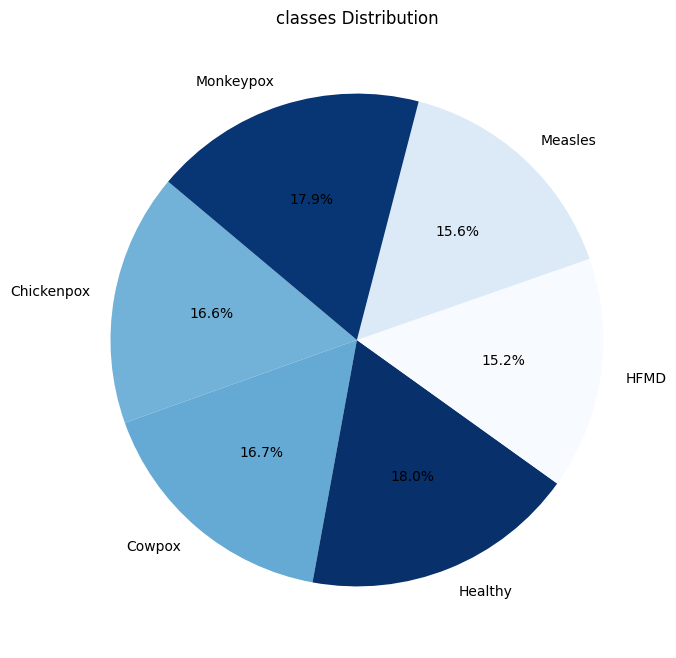

In [14]:
plot_pie_chart(total_count, 'classes Distribution')

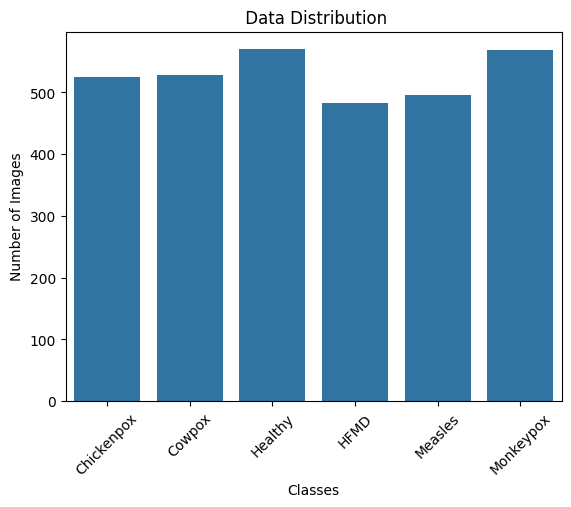

3169

In [15]:
def plot_distribution(data_count, title):
    sns.barplot(x=list(data_count.keys()), y=list(data_count.values()))
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for combined train+val and test sets
plot_distribution(total_count, ' Data Distribution')

total_images

In [16]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2,shuffle=True)

In [17]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2535
Number of testing examples: 634
Each image is of size: (224, 224)


In [18]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [19]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [20]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [21]:
len(mobile.layers)

91

In [22]:
x = mobile.layers[-2].output

x = Dense(500, activation='relu')(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)


model = Model(inputs=mobile.input, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

C:\Users\zahra\anaconda3\envs\tensorflowGPU\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


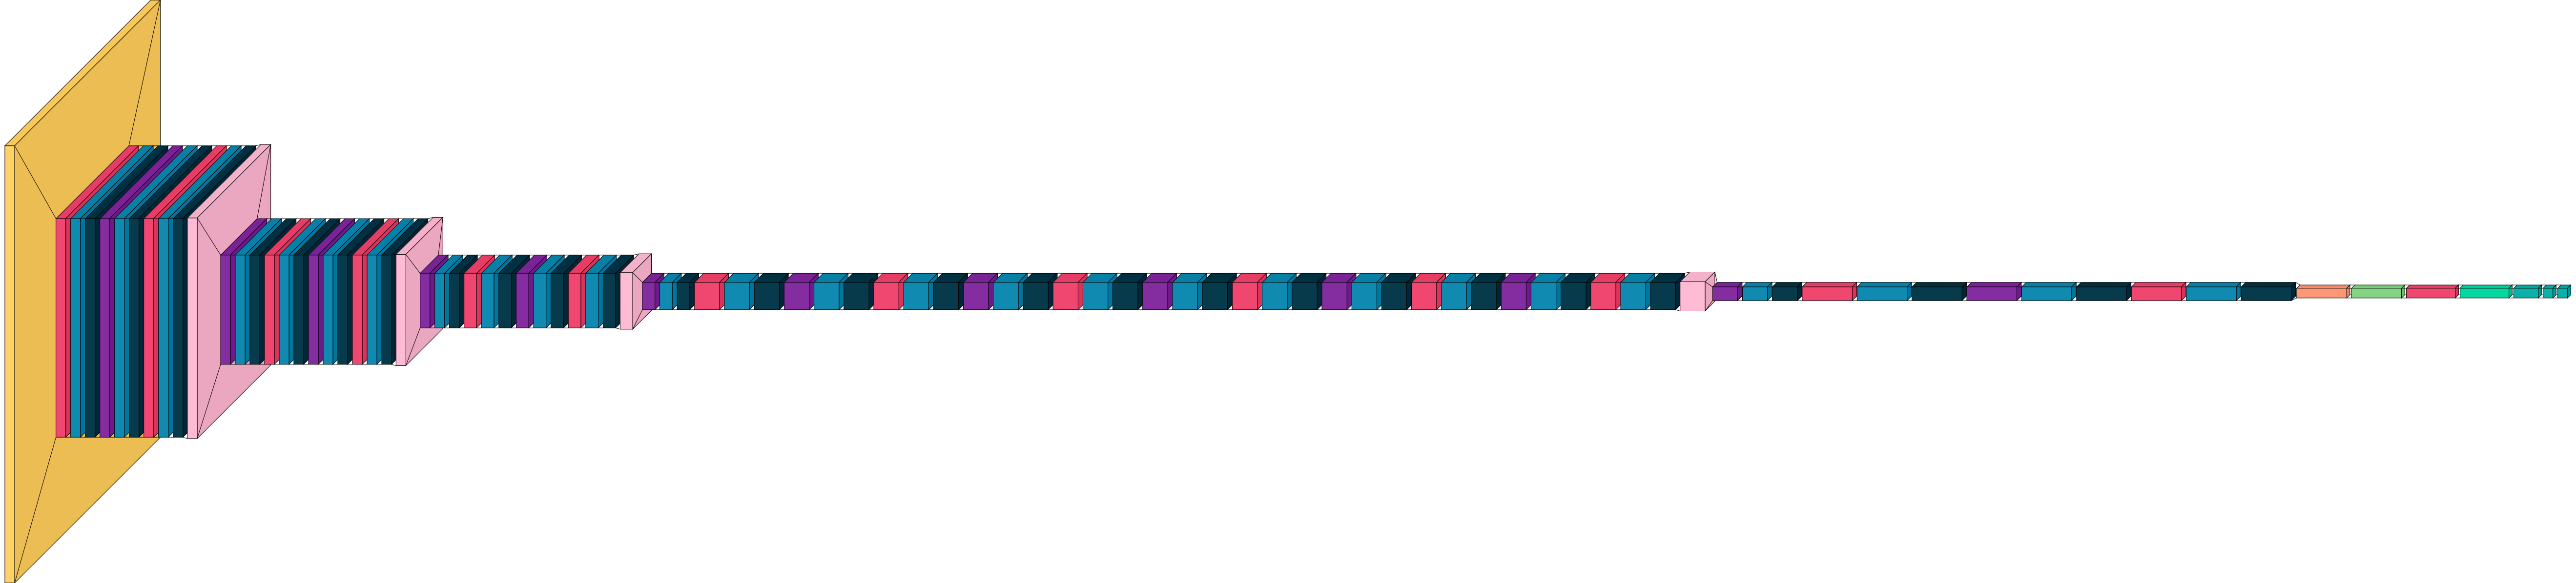

In [23]:
visualkeras.layered_view(model)

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

optimizer = Adam(learning_rate=0.001)

In [26]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [27]:
history = model.fit(train_images, train_labels,
                        epochs=100,
                        validation_split=0.2,
                        #callbacks=[early_stopping],
                        verbose=1)

Epoch 1/100
64/64 [==============================] - 18s 97ms/step - loss: 1.2084 - accuracy: 0.6667 - val_loss: 4.1472 - val_accuracy: 0.3669
Epoch 2/100
64/64 [==============================] - 5s 81ms/step - loss: 0.4257 - accuracy: 0.8664 - val_loss: 3.1044 - val_accuracy: 0.5148
Epoch 3/100
64/64 [==============================] - 5s 81ms/step - loss: 0.2574 - accuracy: 0.9196 - val_loss: 0.9772 - val_accuracy: 0.7929
Epoch 4/100
64/64 [==============================] - 5s 84ms/step - loss: 0.1966 - accuracy: 0.9393 - val_loss: 1.3060 - val_accuracy: 0.7239
Epoch 5/100
64/64 [==============================] - 5s 82ms/step - loss: 0.2074 - accuracy: 0.9305 - val_loss: 0.7574 - val_accuracy: 0.8225
Epoch 6/100
64/64 [==============================] - 5s 82ms/step - loss: 0.1355 - accuracy: 0.9561 - val_loss: 1.1912 - val_accuracy: 0.7771
Epoch 7/100
64/64 [==============================] - 5s 83ms/step - loss: 0.1748 - accuracy: 0.9423 - val_loss: 1.1155 - val_accuracy: 0.7712
Epoch

In [29]:
y_pred_probabilities = model.predict(test_images)
y_pred = np.argmax(y_pred_probabilities, axis=1)

accuracy = accuracy_score(test_labels, y_pred)
print(f'Test Accuracy: {accuracy}')

from sklearn.metrics import classification_report

# Generate classification report for precision, recall, and f1-score
report = classification_report(test_labels, y_pred, target_names=class_names_label.keys())
print("Classification Report:")
print(report)

20/20 [==============================] - 1s 21ms/step
Test Accuracy: 0.9274447949526814
Classification Report:
              precision    recall  f1-score   support

  Chickenpox       0.88      0.99      0.93       100
      Cowpox       1.00      0.96      0.98       120
     Healthy       0.91      0.99      0.95       108
        HFMD       0.88      0.92      0.90       100
     Measles       0.92      0.94      0.93        89
   Monkeypox       0.97      0.78      0.86       117

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634



In [30]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_his(history):
    plt.figure(figsize=(15,12))
    metrics = ['accuracy', 'loss']
    for i, metric in enumerate(metrics):
        plt.subplot(220+1+i)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[1], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()
    plt.show()

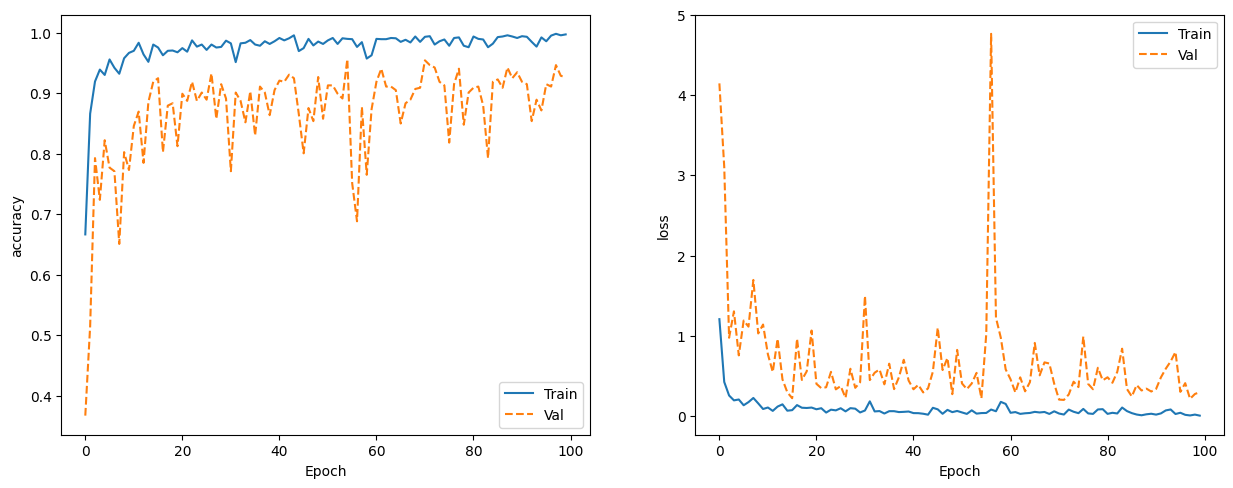

In [31]:
plot_his(history)

20/20 [==============================] - 0s 20ms/step


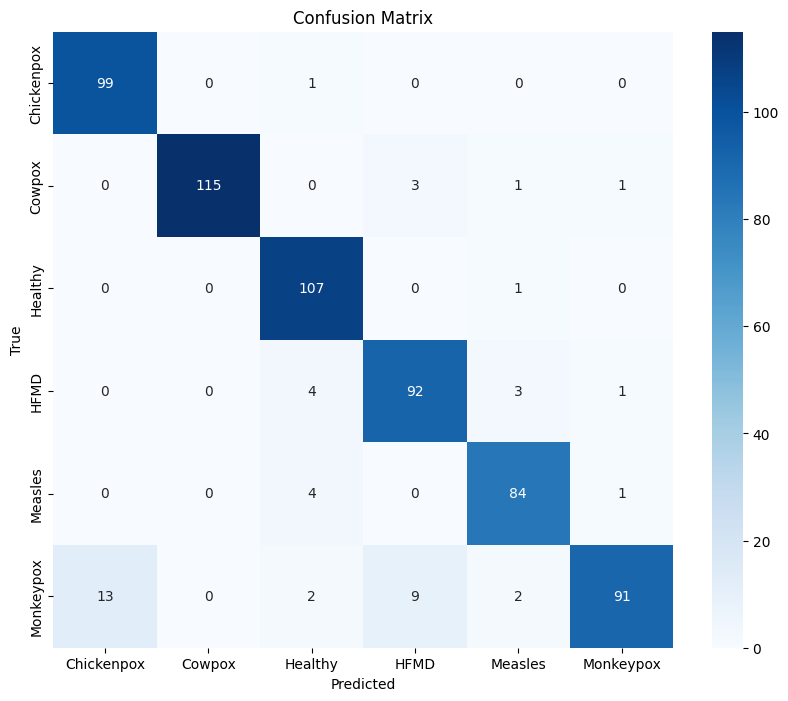

In [32]:
y_pred_probabilities = model.predict(test_images)
y_pred = np.argmax(y_pred_probabilities, axis=1)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_label.keys(), yticklabels=class_names_label.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()